In [40]:
import numpy as np
import pandas as pd 
import os
print(os.listdir("../input"))
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils


['fer2013.csv']


In [41]:
x = pd.read_csv('../input/fer2013.csv')
print (x.values.shape)
df=x

(35887, 3)


In [7]:
x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
data = x.values
print (data.shape)
print (data[0, 0])


(35887, 3)
0


##  The following code was use in order to save the png images from the csv file ... i.e. 0 denotes angry , 1 denotes disgusted(we'll omit this later) , 2 denotes fearful , 3- happy, 4 -sad,5-surprised and 6 neutral (we can discuss further on this later)
    
        if df['emotion'][i] == 0:
            img.save('train/angry/im'+str(angry)+'.png')
            angry += 1
        elif df['emotion'][i] == 1:
            img.save('train/disgusted/im'+str(disgusted)+'.png')
            disgusted += 1
        elif df['emotion'][i] == 2:
            img.save('train/fearful/im'+str(fearful)+'.png')
            fearful += 1
        elif df['emotion'][i] == 3:
            img.save('train/happy/im'+str(happy)+'.png')
            happy += 1
        elif df['emotion'][i] == 4:
            img.save('train/sad/im'+str(sad)+'.png')
            sad += 1
        elif df['emotion'][i] == 5:
            img.save('train/surprised/im'+str(surprised)+'.png')
            surprised += 1
        elif df['emotion'][i] == 6:
            img.save('train/neutral/im'+str(neutral)+'.png')
            neutral += 1

In [9]:
y = data[:, 0]
pixels = data[:, 1]
print (type(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
8287
3


In [10]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [45]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [44]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [43]:
x = X

3
3
2
0
6
6


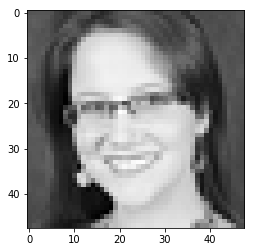

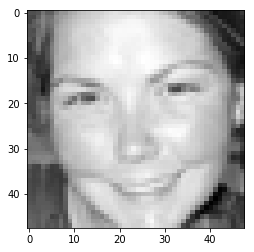

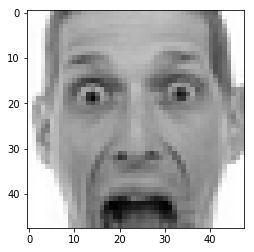

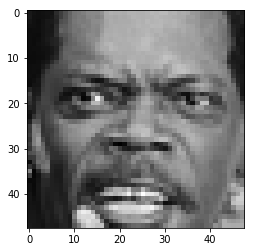

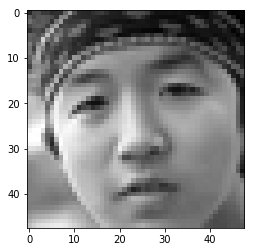

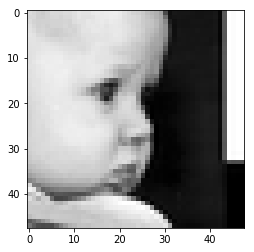

In [46]:
for i in range(7,13):
    plt.figure(i)
    plt.imshow(x[i].reshape((48, 48)), interpolation='none', cmap='gray')
    print(df['emotion'][i])
plt.show()

In [16]:
x = x / 255

In [17]:
x

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [18]:
X_train = x[0:28710, :]
Y_train = y[0:28710]
print (X_train.shape, Y_train.shape)
X_crossval = x[28710:32300, :]
Y_crossval = y[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [19]:
X_train = X_train.reshape((X_train.shape[0], 1 , 48, 48 ))
X_crossval = X_crossval.reshape((X_crossval.shape[0], 1 ,48, 48))

In [20]:
X_train.shape

(28710, 1, 48, 48)

In [21]:
print (y.shape)
y_ = np_utils.to_categorical(y, 7)
print (y_.shape)

(35887,)
(35887, 7)


In [22]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(3590, 1, 48, 48) (3590, 7)


In [47]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [48]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/callbacks.py:928: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.


In [49]:
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [50]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(1,48,48)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation=swish_activation))
model.add(Dropout(0.4))
model.add(Dense(7 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 48, 48)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 48, 48)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 24, 24)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 24, 24)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 24, 24)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 12, 12)        55392     
__________

In [28]:
batch_size = 128
epochs = 10

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [29]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 2)

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/preprocessing/image.py:1127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (28710, 1, 48, 48) (48 channels).


Epoch 1/10
 - 1289s - loss: 0.4042 - acc: 0.8552 - val_loss: 0.3838 - val_acc: 0.8571
Epoch 2/10
 - 1306s - loss: 0.3839 - acc: 0.8576 - val_loss: 0.3546 - val_acc: 0.8625
Epoch 3/10
 - 1302s - loss: 0.3465 - acc: 0.8690 - val_loss: 0.3154 - val_acc: 0.8781
Epoch 4/10
 - 1308s - loss: 0.3143 - acc: 0.8783 - val_loss: 0.2895 - val_acc: 0.8840
Epoch 5/10
 - 1301s - loss: 0.2912 - acc: 0.8849 - val_loss: 0.2757 - val_acc: 0.8891
Epoch 6/10
 - 1295s - loss: 0.2735 - acc: 0.8901 - val_loss: 0.2681 - val_acc: 0.8915
Epoch 7/10
 - 1312s - loss: 0.2624 - acc: 0.8945 - val_loss: 0.2609 - val_acc: 0.8936
Epoch 8/10
 - 1297s - loss: 0.2509 - acc: 0.8984 - val_loss: 0.2572 - val_acc: 0.8958
Epoch 9/10
 - 1306s - loss: 0.2392 - acc: 0.9034 - val_loss: 0.2551 - val_acc: 0.8971
Epoch 10/10
 - 1305s - loss: 0.2288 - acc: 0.9074 - val_loss: 0.2574 - val_acc: 0.8981


In [30]:
weights = model.get_weights()

In [32]:
np.save('my_model_weights', weights)

In [34]:
np.save('wts', weights)

In [36]:
model.save_weights("hweights.h5")
print("Saved model to disk")

Saved model to disk


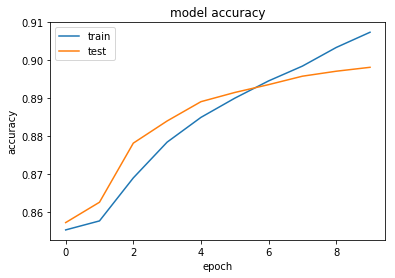

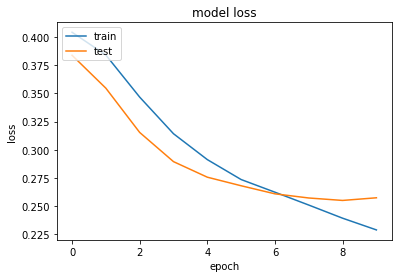

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('jweights.json', 'w') as json_file:
    json_file.write(json_model)